# What I've (Taylor) learned so far
    
- scipy.misc is possibly the best module for loading .ppm images
    - We can convert them to grayscale when reading them in
- values kept in im = misc.imread(<FILENAME>) correspond to intensity on a [0,255] range
- the PIL.Image module has a lot of out of the box methods but casts the images in a class that is difficult to work with
- We are well suited to begin the pycuda implementation of background subtraction 

In [2]:
%matplotlib inline
from PIL import Image
from PIL import ImageDraw
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import pylab
import random

Initial Image


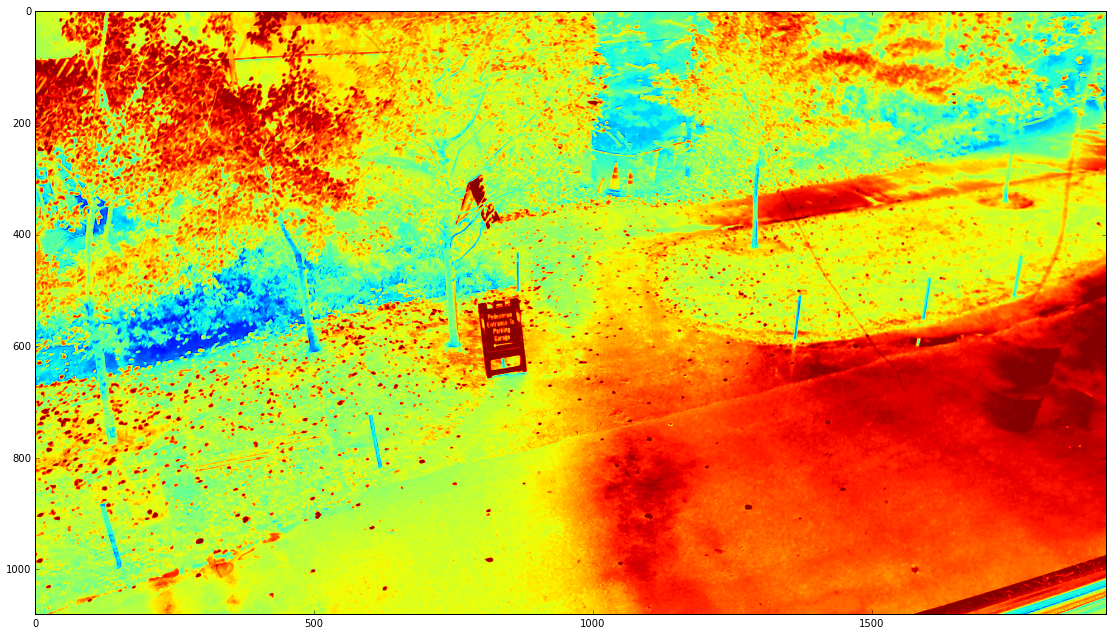

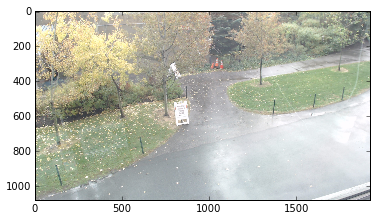

In [3]:
plt.figure(figsize=(19.20, 10.80))
f = misc.imread('cs205_images/grabber003.ppm',flatten=True)
f_color = misc.imread('cs205_images/grabber003.ppm')
f2 = misc.imread('cs205_images/grabber004.ppm',flatten=True)
# misc.imsave('cs205_images/grabber002.ppm', f)
f3 = f2-f
print "Initial Image"
plt.imshow(f)
plt.show()

plt.imshow(f_color)
plt.show()
# print "Next Image in Stack"
# plt.figure(figsize=(12,10))
# plt.imshow(f2)
# plt.show()
# print "Global difference"
# plt.figure(figsize=(12,10))
# plt.imshow(f3)
# plt.show()

In [4]:
f_color.shape

(1080, 1920, 3)

In [3]:
f = Image.open('cs205_images/grabber003.ppm')
im = np.array(f)

What you can see is that with the variation in light between frames that there is significant differences. It will be interesting with this data set to see what kind of intensity variations exist and whether or not that will trip up the anomaly detection.

In [14]:
im[0]

array([[165, 160, 154],
       [164, 159, 153],
       [164, 159, 153],
       ..., 
       [151, 159, 136],
       [156, 161, 141],
       [159, 164, 144]], dtype=uint8)

## Try an overlay using matplotlib

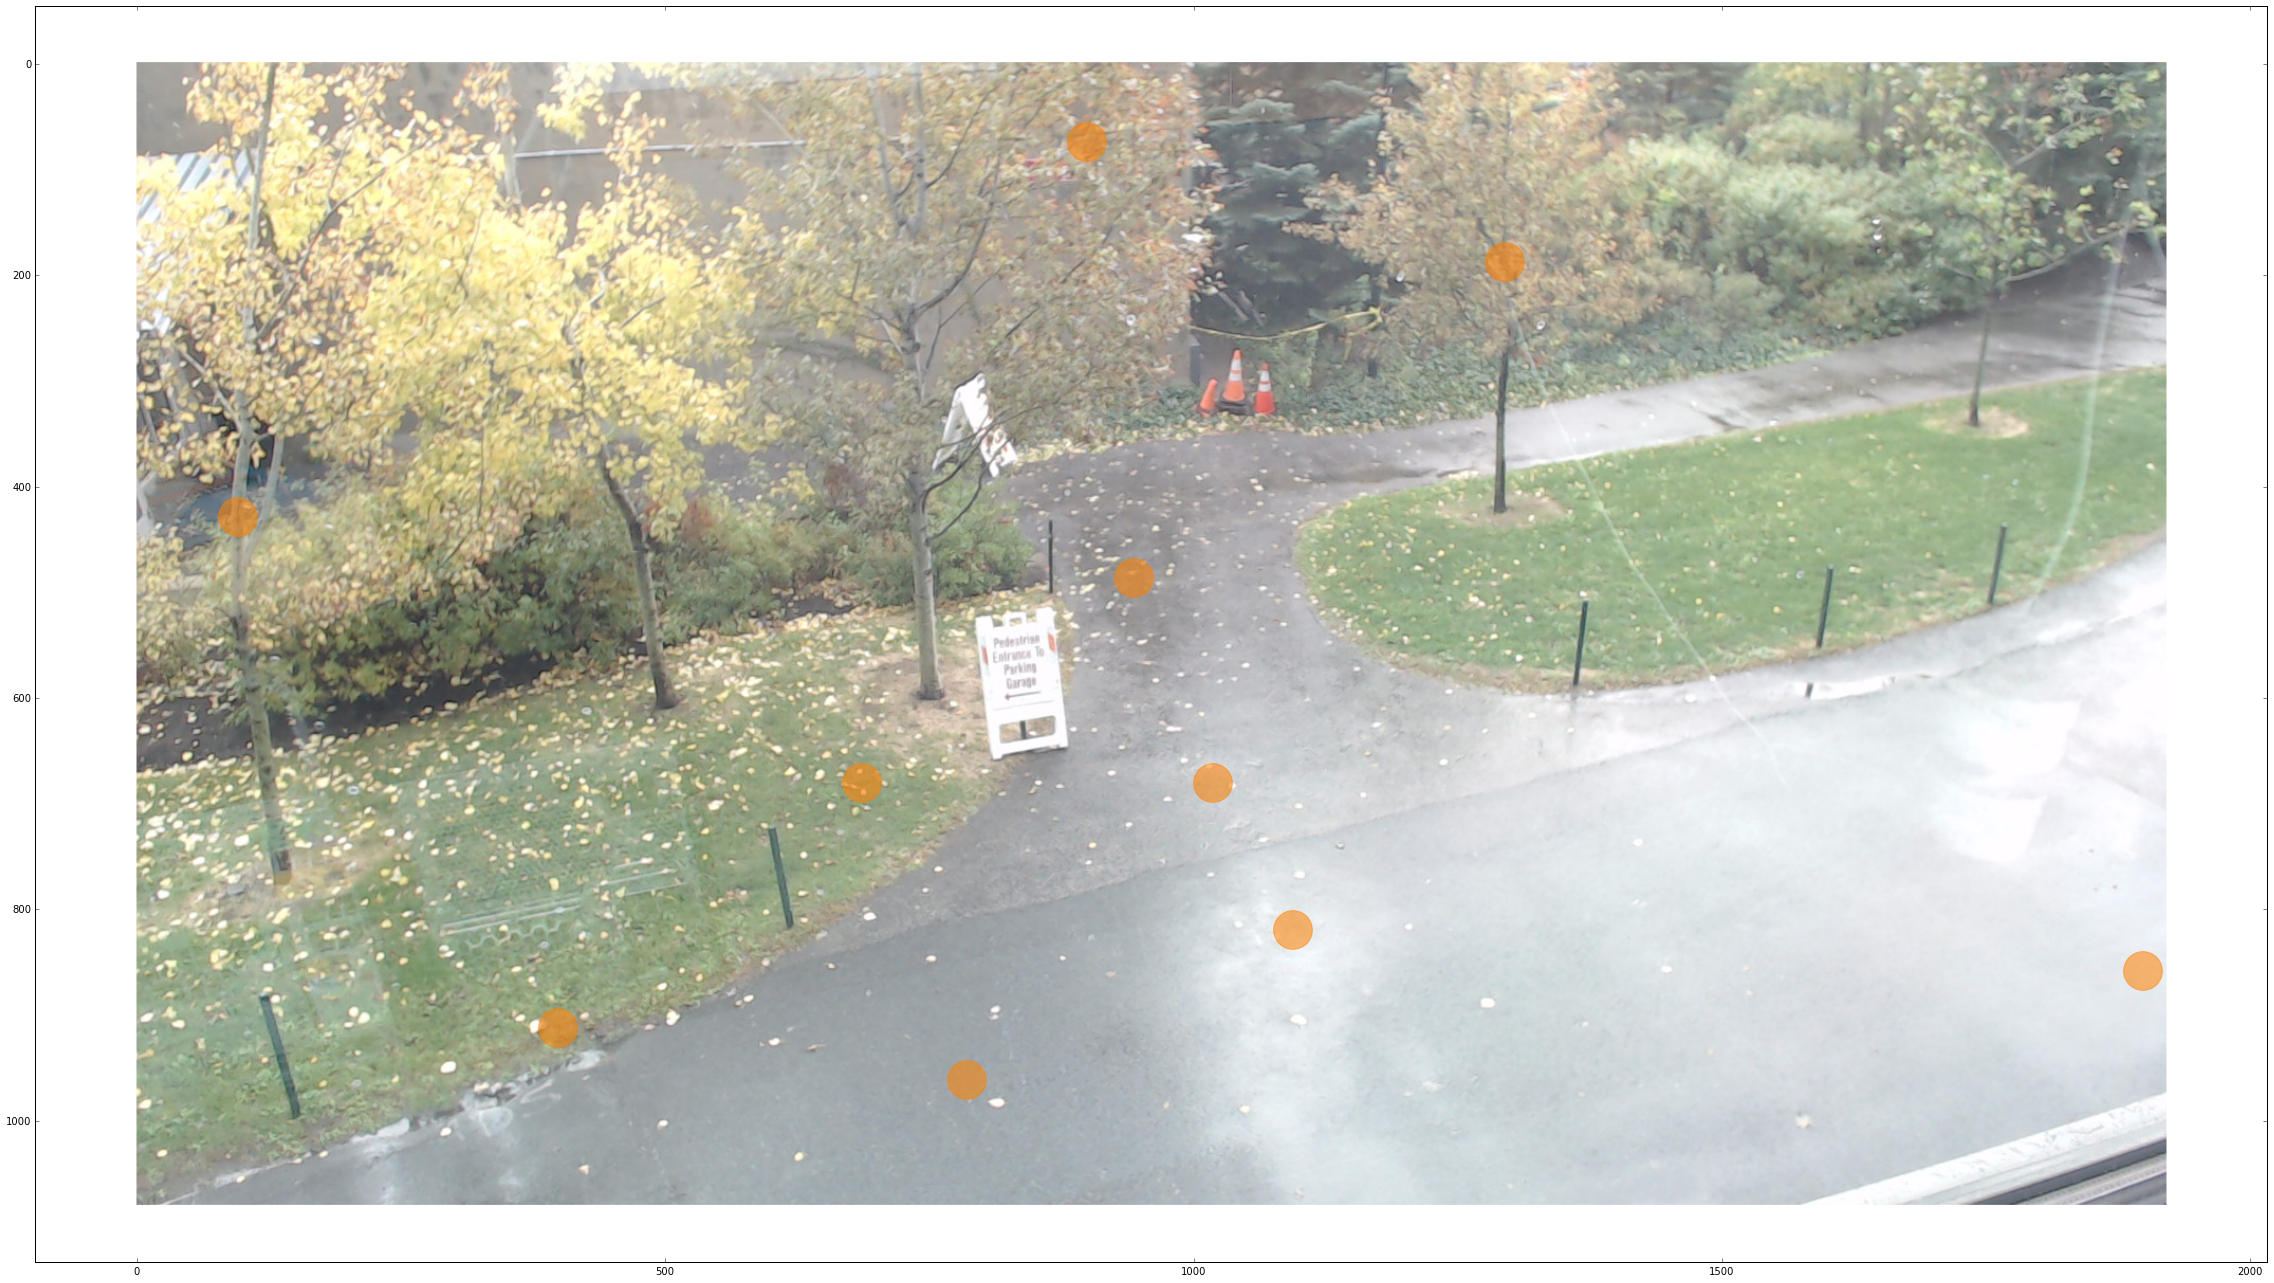

In [33]:
plt.figure(figsize=(40,25))
plt.imshow(f_color)
plt.scatter(rand_x,rand_y,color=np.array([255,129,0])/255.0, s=1500, alpha=0.55)
plt.savefig('cs205_images/overlay_test.png')
plt.show()

What you can't see is that you save the figure at a terrible resolution... Need a better approach

## Using PIL to overlay and save image...

In [7]:
r = 100
x, y = 800, 500
im = Image.open('cs205_images/grabber003.ppm')
draw = ImageDraw.Draw(im)
# draw.point(rand_pts, fill=(255,120,0))
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,120,0))
del draw
im.save('cs205_images/overlay_test2.png')

This works as expected. We'll just need to iteratively place ellipses where there are center points pulled from the superpixel code

# FROM BEFORE

### So we can read these images in directly using numpy/scipy. I'm going to look at how to convert these to grayscale tomorrow and then look at how to do this in sequence. From there I'll be ready to look at some dynamic background subtraction.

In [14]:
f.shape

(1080, 1920, 3)

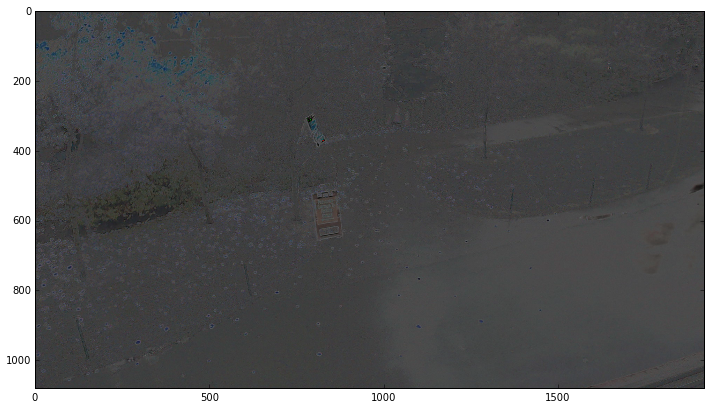

In [20]:
plt.figure(figsize=(12,10))
f2 = misc.imread('cs205_images/grabber004.ppm')
f3 = f-f2
plt.imshow(f3)
plt.show()

In [27]:
im = np.load('cs205_images/grabber004.ppm')['image'].astype(np.float32)
# im = Image.open('cs205_images/grabber004.ppm')
# im = im.convert(mode='L')
# im = misc.imread(im)


# im2 = Image.open('cs205_images/grabber005.ppm')
# im2 = im2.convert(mode='L')
# im2 = misc.imread(im2)

# im3 = im2-im
# im3
plt.imshow(im)

IOError: Failed to interpret file 'cs205_images/grabber004.ppm' as a pickle